<div style="text-align: center; font-weight: bold; font-size: 18px;">
    Estrategias de Crecimiento Basadas en Segmentación Inteligente: Impulsando el Éxito de una Tienda Multinacional de Retail mediante el Análisis del Comportamiento de los Clientes
</div>

<div style="text-align: center; font-weight: bold; font-size: 18px; margin-top: 10px;">
    Growth Strategies Based on Intelligent Segmentation: Driving the Success of a Multinational Retail Store through Customer Behavior Analysis.
</div>

<div style="text-align: center; font-size: 18px;">
    Introducción / Introduction
</div>

El siguiente proyecto hizo parte de un hackathon auspiciado por Triple Ten, en el que un equipo interdisciplinario tenía como objetivo desarrollar un modelo de machine learning para clasificar a los clientes de una tienda multinacional de retail, de acuerdo al nivel de lealtad que estos mantenían con la tienda. 

Los clientes se clasificaron en tres grupos:

- **Clientes oro:** Clientes muy activos, con compras recientes y representan un ingreso elevado para la tienda.
- **Clientes plata:** Clientes activos que compran frecuentemente y representan un ingreso medio.
- **Clientes bronce:** Clientes que realizan compras esporádicas con compras menos recientes y representan un ingreso bajo.

Esto permitió generar estrategias de marketing para mantener la relación con los clientes oro, e incentivar el aumento de la interacción con los clientes plata y bronce. Cabe destacar que este tipo de modelos de machine learning posibilita la fragmentación de las bases de datos, y con ello hacer campañas personalizadas para los clientes, de acuerdo a su clasificación. 

Asimismo dado que la tienda tiene presencia global, se hizo un análisis regionalizado, en el que observamos cómo cambia el comportamiento de los clientes de acuerdo al país, con la pretensión de generar estrategias de mercadeo para seguir fortaleciendo la marca en los distintos lugares donde se tiene presencia. 

Por ultimo, para observar otras fronteras de oportunidad, se analizó el numero de devoluciones y las tendencias en el consumo de ciertos productos, en miras de evaluar cómo se desarrolla el servicio al cliente y también qué parte de la oferta de inventario podía estar generando mayores retos. 

En términos generales, se le recomendó a la empresa enfocarse en fortalecer la marca en países donde las ventas aún no han alcazado cifras muy altas, en lugar de buscar abrir presencia en nuevos mercados, esto porque se identifica un comportamiento regional desbalanceado, es decir, mientras en algunos países como el Reino Unido, las cifras en ventas son muy altas, en otros países como Sudafrica los niveles son considerablemente más bajos. 

Por otro lado, aunque hay una concentración muy alta de clientes en el Reino Unido, al excluir este pais, se puede observar que predominan los clientes plata, esto es una frontera de oportunidad importante porque el objetivo debería ser una concentración significativa de clientes oro en todas las regiones. Además el margen entre los tres grupos de clientes no es muy amplia, es decir, la distribución de clientes es muy igualitaria, pero ese no es el escenario deseado. 

En función de lo anterior se proponen algunas estrategias como: 
- Fortalecimiento de la marca en mercados locales mediante campañas publicitarias, redes sociales, alianzas con influercers locales, así como aumentar la participación e incluso el patrocinio en eventos regionales. 
- Ofrecer ofertas a los clientes plata para incentivar las ventas en este grupo, así como generar publicidad atractiva para ellos, que permita crear identidad con la marca y así aumentar la retención. 
- Diseñar programas de "lealtad" que le ofrezcan descuentos a los clientes plata, para aumentar también su consumo y frecuencia de compra; esto puede incluir descuentos exclusivos, acceso anticipado a nuevos productos, entre otros. 
- Analizar las preferencias de los consumidores en mercados específicos y adaptar la oferta de productos en función de estas preferencias.

**EN:** 

The following project was part of a hackathon sponsored by Triple Ten, in which an interdisciplinary team aimed to develop a machine learning model to classify customers of a multinational retail store according to their level of loyalty to the store.

Customers were classified into three groups:

- **Gold Customers:** Highly active customers with recent purchases who represent significant revenue for the store.
- **Silver Customers:** Active customers who frequently shop and represent medium revenue.
- **Bronze Customers:** Customers who make sporadic purchases with less recent buying behavior, representing low revenue.
This classification allowed for the development of marketing strategies to maintain relationships with gold customers while encouraging increased interaction with silver and bronze customers. It is important to note that this type of machine learning model enables the segmentation of databases, allowing for personalized campaigns based on customer classification.

Additionally, since the store has a global presence, a regional analysis was conducted to observe how customer behavior changes by country, with the aim of generating marketing strategies to continue strengthening the brand in various locations.

Finally, to identify other opportunities, the number of returns and consumption trends of certain products were analyzed to assess how customer service is evolving and which parts of the inventory might be presenting greater challenges.

In general terms, it was recommended that the company focus on strengthening the brand in countries where sales have not yet reached high figures, rather than seeking to establish a presence in new markets. This recommendation stems from the identification of an imbalanced regional behavior, meaning that while sales figures are very high in some countries like the United Kingdom, in others like South Africa, the levels are considerably lower.

On the other hand, although there is a very high concentration of customers in the United Kingdom, when this country is excluded, it can be observed that silver customers predominate. This represents an important opportunity because the goal should be to achieve a significant concentration of gold customers in all regions. Furthermore, the margin between the three customer groups is not very wide, indicating that customer distribution is quite equal, which is not the desired scenario.

Based on the above, several strategies are proposed, such as:

- Strengthening the brand in local markets through advertising campaigns, social media, partnerships with local influencers, and increasing participation and even sponsorship in regional events.
- Offering promotions to silver customers to incentivize sales within this group, as well as creating attractive advertising that fosters brand identity and increases retention.
- Designing loyalty programs that offer discounts to silver customers to also increase their consumption and purchase frequency; this may include exclusive discounts, early access to new products, among others.
- Analyzing consumer preferences in specific markets and adapting the product offering based on these preferences.

In [32]:
#Importar librerías / Import libraries

import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [33]:
# Funciones/Functions
def process_dataset(file_path, output_directory, file_type='csv', **kwargs):
    """
    Procesa el dataset desde la carga hasta la limpieza y guarda el resultado final, eliminando archivos intermedios.

    Parameters:
        file_path (str): La ruta del archivo de entrada.
        output_directory (str): El directorio donde se guardarán los archivos de salida.
        file_type (str): El tipo de archivo para guardar ('csv' o 'excel'). El valor por defecto es 'csv'.
        **kwargs: Argumentos adicionales que se pasarán a la función de carga y guardado.

    Returns:
        pd.DataFrame: El DataFrame procesado.
    """
    df = load_dataset(file_path, file_type, **kwargs)
    if df is None:
        return None

    intermediate_paths = []

    # Paso 1: Limpieza de datos
    df, _ = clear_data(df)
    intermediate_path = f"{output_directory}df_step1.{file_type}"
    save_dataset(df, intermediate_path, file_type, index=False)
    intermediate_paths.append(intermediate_path)

    # Paso 2: Eliminar outliers
    df = clean_data(df)
    intermediate_path = f"{output_directory}df_step2.{file_type}"
    save_dataset(df, intermediate_path, file_type, index=False)
    intermediate_paths.append(intermediate_path)

    # Paso 3: Categorizar transacciones
    df = categorize_transaction(df)
    intermediate_path = f"{output_directory}df_step3.{file_type}"
    save_dataset(df, intermediate_path, file_type, index=False)
    intermediate_paths.append(intermediate_path)

    # Guardar el dataset final
    final_path = f"{output_directory}df_processed.{file_type}"
    save_dataset(df, final_path, file_type, index=False)

    # Eliminar archivos intermedios
    remove_intermediate_files(intermediate_paths)

    return df

In [34]:
def load_dataset(file_path, file_type='csv', sep=',', encoding='latin1'):
    """
    Carga un dataset desde una ruta de archivo y crea las columnas necesarias para continuar con el análisis.

    Parameters:
        file_path (str): La ruta del archivo.
        file_type (str): Se puede especificar el tipo de archivo ('csv' o 'excel'). El valor por defecto es 'csv'.
        **kwargs: Argumentos adicionales que se pasarán a la función de carga: headers, sep, encoding, etc.

    Returns:
        df: El dataset cargado y con nombres de columnas ajustados desde el archivo.
    """
    try:
        if file_type == 'csv':
            df = pd.read_csv(file_path, sep=sep, encoding=encoding)
        elif file_type == 'excel':
            df = pd.read_excel(file_path, sep=sep, encoding=encoding)
        else:
            print(f"Tipo de archivo {file_type} no soportado.")
            return None
        print(f"Dataset cargado desde {file_path}.")
        df = encabezados(df)
        df['total_cost'] = df['quantity'] * df['unit_price']
        df['invoice_date'] = pd.to_datetime(df['invoice_date'], format="%d/%m/%Y %H:%M")
        df['month'] = df['invoice_date'].dt.month
        df['year'] = df['invoice_date'].dt.year
        print("Encabezados ajustados.")
        print(df.head(10))
        print(df.info())
        return df
    except FileNotFoundError:
        print(f"El archivo {file_path} no se encontró.")
    except pd.errors.EmptyDataError:
        print("El archivo está vacío.")
    except pd.errors.ParserError:
        print("Error al analizar el archivo.")
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return None


In [35]:
def encabezados(df):
    '''
    Renombra las columnas para que estén de acuerdo al estándar 'snake_case'.
    '''
    new_col_names = []
    for name in df.columns:
        name_lowered = name.lower()
        name_stripped = name_lowered.strip()
        name_no_spaces = name_stripped.replace(' ', '_')
        name_string = str(name_no_spaces)
        new_col_names.append(name_string)
    df.columns = new_col_names
    return df


In [36]:
def clear_data(df, columns=['description', 'customer_id'], critic_columns=['quantity', 'unit_price', 'customer_id', 'total_cost']):
    """
    Esta función elimina duplicados explícitos.
    Se pueden seleccionar columnas para rellenar con 'unknown' valores nulos.

    Parameters:
        df : dataset a limpiar.
        critic_columns (list): Lista de columnas que se analizarán para eliminar valores nulos.
        columns (list): Lista de columnas que se analizarán para cambiar valores nulos por 'unknown'.

    Returns:
        df: dataset limpio.
        dict: El número de valores nulos encontrados antes de la limpieza.
    """
    if df is None:
        print("El DataFrame está vacío. No se puede proceder con la limpieza de datos.")
        return None, {}
    df = df.drop_duplicates()
    df = df.dropna(subset=critic_columns)
    null_counts = {}
    for column in columns:
        null_count = df[column].isnull().sum()
        null_counts[column] = null_count
        print(f"Valores nulos en la columna '{column}': {null_count}")
        if null_count > 0:
            df[column] = df[column].fillna('unknown')
    return df, null_counts

In [37]:
def remove_outliers(df, column1 = 'quantityt', column2 = 'unit_price'):
    """
    Elimina outliers de una columna específica del DataFrame.

    Parameters:
        df: El DataFrame que se va a modificar.
        column (str): El nombre de la columna de la que se eliminarán los outliers.

    Returns:
        pd.DataFrame: El DataFrame sin outliers en la columna especificada.
    """
    Q1 = df[column1].quantile(0.25)
    Q3 = df[column1].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column1] >= lower_bound) & (df[column1] <= upper_bound)]
    return df
    Q1 = df[column2].quantile(0.25)
    Q3 = df[column2].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column2] >= lower_bound) & (df[column2] <= upper_bound)]
    return df


In [38]:
def clean_data(df, column1= 'quantity', column2= 'unit_price'):
    """
    Limpia el dataset eliminando duplicados, filas con valores nulos en las columnas críticas y outliers.

    Parameters:
        df: El datasert que se va a limpiar.

    Returns:
        df: El dataset limpio.
    """

    # Eliminar filas con unit_price igual a 0.0
    df = df[df['unit_price'] != 0.0]

    # Eliminar duplicados
    df = df.drop_duplicates()

    # Eliminar filas con valores nulos en las columnas críticas
    df = df.dropna(subset=['quantity', 'unit_price', 'customer_id', 'total_cost'])

    # Eliminar outliers
    df = remove_outliers(df, column1)
    df = remove_outliers(df, column2)

    return df


In [41]:
def categorize_transaction(df, column1='stock_code', column2='quantity'):
    """
    Función que categoriza dependiendo de la columna seleccionada para evaluar el tipo de operación: otros, ventas, devoluciones.

    Parameters:
        df: El dataset que se va a modificar.
        column1 (str): El nombre de la columna que se va a evaluar, tiene como valor por defecto 'stock_code'.
        column2 (str): El nombre de la columna que se va a evaluar, tiene como valor por defecto 'quantity'.

    Returns:
        pd.DataFrame: El DataFrame con la nueva columna 'transaction_type' que indica la categoría de la operación.
    """
    if df is None:
        print("El DataFrame está vacío. No se puede proceder con la categorización de transacciones.")
        return None
    categorias_especificas = ['amazonfee', 'post', 's', 'pads', 'cruk', 'dcgssgirl', 'm', 'd', 'dot']

    def categorize(row):
        stock_code = row[column1]
        quantity = row[column2]
        if stock_code in categorias_especificas:
            return 'otros'
        elif quantity > 0:
            return 'ventas'
        elif quantity < 0:
            return 'devoluciones'
        else:
            return 'otros'

    df['transaction_type'] = df.apply(categorize, axis=1)
    print(df.head())
    return df



In [42]:
def save_dataset(df, output_path, file_type='csv', **kwargs):
    """
    Guarda un dataset en un archivo.

    Parameters:
        df: El DataFrame que se va a guardar.
        output_path (str): La ruta del archivo de salida.
        file_type (str): El tipo de archivo para guardar ('csv' o 'excel'). El valor por defecto es 'csv'.
    """
    try:
        if file_type == 'csv':
            df.to_csv(output_path, **kwargs)
        elif file_type == 'excel':
            df.to_excel(output_path, **kwargs)
        else:
            print(f"Tipo de archivo {file_type} no soportado.")
        print(f"Dataset guardado en {output_path}.")
    except Exception as e:
        print(f"Ocurrió un error al guardar el archivo: {e}")

In [43]:
def remove_intermediate_files(paths):
    """
    Elimina archivos intermedios.

    Parameters:
        paths (list): lista de rutas de archivos a eliminar.
    """
    for path in paths:
        try:
            os.remove(path)
            print(f"Archivo {path} eliminado.")
        except Exception as e:
            print(f"No se pudo eliminar el archivo {path}: {e}")

In [44]:
def load_dataset_1(file_path, file_type='csv', sep=',', encoding='latin1'):
    """
    Carga un dataset desde una ruta de archivo.

    Parameters:
        file_path (str): La ruta del archivo.
        file_type (str): Se puede especificar el tipo de archivo ('csv' o 'excel'). El valor por defecto es 'csv'.
        **kwargs: Argumentos adicionales que se pasarán a la función de carga: headers, sep, encoding, etc.

    Returns:
        df: El DataFrame cargado y con nombres de columnas ajustados desde el archivo.
    """
    try:
        if file_type == 'csv':
            df = pd.read_csv(file_path, sep=sep, encoding=encoding)
        elif file_type == 'excel':
            df = pd.read_excel(file_path, sep=sep, encoding=encoding)
        else:
            print(f"Tipo de archivo {file_type} no soportado.")
            return None
        print(f"Dataset cargado desde {file_path}.")
        print("Encabezados ajustados.")
        return df
    except FileNotFoundError:
        print(f"El archivo {file_path} no se encontró.")
    except pd.errors.EmptyDataError:
        print("El archivo está vacío.")
    except pd.errors.ParserError:
        print("Error al analizar el archivo.")
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return None


In [45]:
def top_months_sales(df, column1='month', column2='total_cost', column3='region'):
    """
    Función para realizar un gráfico que indica los meses con más ventas.

    Parameters:
        df: El dataset que se va a graficar.
        column1 (str): El nombre de la columna que se usa para agrupar tiene como valor por defecto 'month'.
        column2 (str): El nombre de la columna que contiene valores de ventas, tiene como valor por defecto 'total_cost'.

    Returns:
        Gráfico de meses con mayores ventas.
    """
    global_sales = df.groupby(column1)[column2].sum().sort_values()
    sns.set(style='whitegrid')
    plt.figure(figsize=(20, 6))
    sns.barplot(x=global_sales.index, y=global_sales.values, palette='viridis', hue=global_sales.index, legend=False)
    plt.title('Total de Compras por Mes')
    plt.xlabel('Mes')
    plt.ylabel('Total de Compras')
    plt.show()
    return global_sales


In [46]:
def unit_price_volume_relation(df, column1='unit_price', column2='quantity'):
    """
    Función para generar un gráfico de dispersión que muestra la relación entre el precio unitario y el volumen de compra global.

    Parameters:
        df: El dataset que se va a graficar.
        column1 (str): El nombre de la columna que contiene el precio unitario tiene como valor por defecto 'unit_price'.
        column2 (str): El nombre de la columna que contiene el volumen de compra tiene como valor por defecto 'quantity'.

    Returns:
        Gráfico de dispersión que muestra la relación entre el precio unitario y el volumen de compra global.
    """
    global_relation = df.groupby(column1)[column2].sum().reset_index()
    sns.set(style='whitegrid')
    plt.figure(figsize=(20, 6))
    sns.scatterplot(x=column1, y=column2, data=global_relation, hue=column2, palette='viridis', size=column2, sizes=(20, 200))
    plt.title('Relación Precio Unitario / Volumen de Compra')
    plt.xlabel('Precio Unitario')
    plt.ylabel('Volumen de Compra')
    plt.show()
    return global_relation


In [47]:
def returns_by_region(df, column1='transaction_type', label='devoluciones', column2='region'):
    """
    Función que calcula la cantidad de devoluciones por región y devuelve un gráfico de barras con los resultados.

    Parameters:
        df: El dataset que se va a analizar.
        column1 (str): El nombre de la columna que contiene el tipo de transacción tiene como valor por defecto 'transaction_type'.
        label (str): El nombre de la etiqueta que se usará en el gráfico tiene como valor por defecto 'devoluciones'.
        column2 (str): El nombre de la columna que contiene la región tiene como valor por defecto 'region'.

    Returns:
        Gráfico de barras con la cantidad de devoluciones por región.
    """
    returns_df = df[df[column1] == label]
    returns_by_region = returns_df[column2].value_counts().reset_index()
    returns_by_region.columns = ['region', 'count']
    returns_by_region = returns_by_region.sort_values(by='count', ascending = False)
    sns.set(style='whitegrid')
    plt.figure(figsize=(20, 6))
    sns.barplot(x='region', y='count', data=returns_by_region)
    plt.title('Cantidad de Devoluciones por Región')
    plt.xlabel('Región')
    plt.ylabel('Cantidad de Devoluciones')
    plt.xticks(rotation=45)
    plt.show()
    return returns_by_region


In [48]:
def top_regions_sales(df, column1='transaction_type', label='ventas', column2='region'):
    sales_df = df[df[column1] == label]
    sales_df = sales_df[column2].value_counts().reset_index()
    sales_df.columns = ['region', 'count']
    sales_df = sales_df.sort_values(by='count', ascending = False)
    sns.set(style='whitegrid')
    plt.figure(figsize=(20, 6))
    sns.barplot(x='region', y='count', data=sales_df)
    plt.title('Compras por región')
    plt.xlabel('Región')
    plt.ylabel('Cantidad de Compras')
    plt.xticks(rotation=45)
    plt.show()
    return sales_df


In [49]:
def top_products_sales(df, column1='description', column2='quantity'):
    """
    Función para generar un gráfico de barras que muestra los productos de mayor venta a nivel global.

    Parameters:
        df: El dataset que se va a graficar.

    Returns:
        Gráfico de barras que muestra los productos de mayor venta a nivel global.
    """
    global_top_products = df.groupby(column1)[column2].sum().sort_values(ascending=False).head(10)
    sns.set(style='whitegrid')
    plt.figure(figsize=(20, 6))
    sns.barplot(x=global_top_products.values, y=global_top_products.index, palette='viridis')
    plt.title('Top 10 Productos con Mayor Compra')
    plt.xlabel('Cantidad Total')
    plt.ylabel('Producto')
    plt.show()
    return global_top_products


In [50]:
def top_products_returns(df, column1='quantity', column2='description'):
    """
    Función para generar un gráfico de barras que muestra los productos con más devoluciones a nivel global.

    Parameters:
        df: El dataset que se va a graficar.
        column1 (str): El nombre de la columna que contiene la cantidad tiene como valor por defecto 'quantity'.
        column2 (str): El nombre de la columna que contiene el producto tiene como valor por defecto 'description'.

    Returns:
        Gráfico de barras que muestra los productos con más devoluciones a nivel global.
    """
    df_returns = df[df[column1] < 0]
    top_returns = df_returns.groupby(column2)[column1].sum().sort_values().head(10)
    sns.set(style='whitegrid')
    plt.figure(figsize=(20, 6))
    sns.barplot(x=top_returns.values, y=top_returns.index, palette='viridis')
    plt.title('Top 10 Productos con Mayor Devolución')
    plt.xlabel('Cantidad Total')
    plt.ylabel('Producto')
    plt.show()
    return top_returns

In [51]:
def price_by_region(df):
    """
    Función que calcula el precio promedio por región y devuelve un gráfico de barras con los resultados.

    Parameters:
        df: El dataset que se va a analizar.

    Returns:
        Gráfico de barras con el precio promedio por región.
    """
    sns.set(style='whitegrid')
    plt.figure(figsize=(20, 6))
    sns.boxplot(x='region', y='unit_price', data=df, palette='viridis')
    plt.title('Distribución de Precios por Región', fontsize=16)
    plt.xlabel('Región', fontsize=14)
    plt.ylabel('Precio Unitario', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return None


In [52]:
def create_all_graphs(file_path, file_type='csv', sep=',', encoding='latin1'):
    df = load_dataset_1(file_path, file_type, sep, encoding)
    if df is not None:
        top_months_sales(df)
        unit_price_volume_relation(df)
        returns_by_region(df)
        top_regions_sales(df)
        top_products_sales(df)
        top_products_returns(df)
        price_by_region(df)
    else:
        print("No se pudieron cargar los datos. No se pueden crear los gráficos.")

In [64]:
def ml_kmean(path):
    # abrir archivo ya procesado
    df_processed = pd.read_csv(path)
    # seleccionar ventas
    df_ventas = df[df['transaction_type'] == 'ventas']

    # calcular rfm
    latest_date_v = df_ventas['invoice_date'].max()
    recency_df_v = df_ventas.groupby('customer_id').agg({'invoice_date': lambda x: (latest_date_v - x.max()).days})
    recency_df_v.rename(columns={'invoice_date': 'recency'}, inplace=True)
    recency_df_v = remove_outliers(recency_df_v, ['recency'])

    frequency_df_v = df_ventas.groupby('customer_id').agg({'invoice_no': 'count'})
    frequency_df_v.rename(columns={'invoice_no': 'frequency'}, inplace=True)
    frequency_df_v = remove_outliers(frequency_df_v, ['frequency'])

    monetary_df_v = df_ventas.groupby('customer_id').agg({'total_cost': 'sum'})
    monetary_df_v.rename(columns={'total_cost': 'monetary'}, inplace=True)
    monetary_df_v = remove_outliers(monetary_df_v, ['monetary'])

    # calcular rfm
    latest_date_v = df_ventas['invoice_date'].max()
    recency_df_v = df_ventas.groupby('customer_id').agg({'invoice_date': lambda x: (latest_date_v - x.max()).days})
    recency_df_v.rename(columns={'invoice_date': 'recency'}, inplace=True)
    recency_df_v = remove_outliers(recency_df_v, ['recency'])

    frequency_df_v = df_ventas.groupby('customer_id').agg({'invoice_no': 'count'})
    frequency_df_v.rename(columns={'invoice_no': 'frequency'}, inplace=True)
    frequency_df_v = remove_outliers(frequency_df_v, ['frequency'])

    monetary_df_v = df_ventas.groupby('customer_id').agg({'total_cost': 'sum'})
    monetary_df_v.rename(columns={'total_cost': 'monetary'}, inplace=True)
    monetary_df_v = remove_outliers(monetary_df_v, ['monetary'])

    #unir rfm en un archivo

    rfm_df_v = recency_df_v.join(frequency_df_v).join(monetary_df_v)
    rfm_df_v.dropna(inplace=True)

    #Método de codo

    # Extraer las variables RFM en un nuevo DataFrame
    

    X = rfm_df_v[['recency', 'frequency', 'monetary']].values
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        # Paso 2: Crear la línea desde el primer al último punto
    p1 = np.array([1, wcss[0]])
    p2 = np.array([10, wcss[-1]])

    # Paso 3: Calcular las distancias de cada punto a esta línea
    distances = []
    for i in range(len(wcss)):
        p = np.array([i+1, wcss[i]])
        distance = np.abs(np.cross(p2-p1, p1-p))/np.linalg.norm(p2-p1)
        distances.append(distance)

    # Paso 4: El punto con la distancia máxima es el "codo"
    n_clusters_optimo = distances.index(max(distances)) + 1

    print(f"El número óptimo de clusters es: {n_clusters_optimo}")

    # Guardar info cluster en el archivo rfm


    rfm_df_v['cluster'] = kmeans.fit_predict(X) #guardar cluster

    #renombrar clusters
    rfm_df_v['cluster'] = rfm_df_v['cluster'].replace(0, 'oro')
    rfm_df_v['cluster'] = rfm_df_v['cluster'].replace(1, 'bronce')
    rfm_df_v['cluster'] = rfm_df_v['cluster'].replace(2, 'plata')

    #archivo final
    df_final_1 = pd.merge(df, rfm_df_v, on='customer_id', how='inner')
    df_final = df_final_1[df_final_1['cluster'].isin(['oro', 'bronce', 'plata'])]

    df_final.to_csv('C:\\Users\\Natalia Lopera\\OneDrive\\Desktop\\Busqueda_Trabajo\\proyectos_propios\\hackathon\\df_final.csv', index=False)


    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Subplot 1: Método del Codo
    ax[0].plot(range(1, 11), wcss, marker='o')
    ax[0].set_title('Método del Codo')
    ax[0].set_xlabel('Número de clusters')
    ax[0].set_ylabel('Inercia')

    # Subplot 2: Gráfica de los Clusters
    ax[1].remove()
    ax[1] = fig.add_subplot(1, 2, 2, projection='3d')

    # Graficar los clusters
    kmeans = KMeans(n_clusters=n_clusters_optimo).fit(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.predict(X)
    C = kmeans.cluster_centers_
    colores = ['red', 'green', 'blue']
    asignar = [colores[row] for row in labels]

    ax[1].scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)
    ax[1].scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
    ax[1].set_title('Visualización de Clusters')
    ax[1].set_xlabel('Recency')
    ax[1].set_ylabel('Frequency')
    ax[1].set_zlabel('Monetary')

    plt.tight_layout()
    plt.show()


In [54]:
def ml_plots(path):
    #path = path1[path1['cluster'].isin(['oro', 'bronce', 'plata'])]
    # Diagramas de caja por cluster para cada variable por cluster
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.boxplot(path, x='cluster', y='recency',  hue='cluster')
    plt.subplot(1,3,2)
    sns.boxplot(path, x='cluster', y='frequency',  hue='cluster')
    plt.subplot(1,3,3)
    sns.boxplot(path, x='cluster', y='monetary',  hue='cluster')

    segments = path['cluster'].value_counts()
    plt.figure(figsize = (5, 5), )
    explode = (0.1, 0, 0)
    segments.plot(
    kind = 'pie',
    color=segments.index,
    explode = explode,
    autopct = '%1.2f%%')
    plt.axis('equal')
    plt.legend(labels = segments.index, loc = "best")
    plt.show()

    region_cluster_distribution = path.groupby(['region', 'cluster']).size().unstack(fill_value=0).query("region != 'United Kingdom'") ##sin UK
    top_regions = region_cluster_distribution.sum(axis=1).nlargest(10)
    top_regions_distribution = region_cluster_distribution.loc[top_regions.index]
    top_regions_distribution.plot(kind='bar', stacked=False, figsize=(15, 4))
    plt.title('Top 10 Regions')
    plt.xlabel('Region')
    plt.ylabel('Number of records')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    top_regions_less = region_cluster_distribution.sum(axis=1).nsmallest(10)
    top_regions_distribution = region_cluster_distribution.loc[top_regions_less.index]
    top_regions_distribution.plot(kind='bar', stacked=False, figsize=(15, 4))
    plt.title('Less 10 Regions')
    plt.xlabel('Region')
    plt.ylabel('Number of records')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Estadistica
    print('Recency',path.groupby('cluster')['recency'].mean().round(2))
    print('Frequency',path.groupby('cluster')['frequency'].mean().round(2))
    print('Monetary',path.groupby('cluster')['monetary'].mean().round(2))

    print('cluster oro: clientes que han comprado recientemente, compran con frecuencia y gastan mucho')
    print('cluster plata: clientes intermedios ')
    print('cluster bronce: clientes que no han comprado recientemente, compran con poca frecuencia y gastan poco')


Dataset cargado desde Online_Retail.csv.
Encabezados ajustados.
  invoice_no stock_code                          description  quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365      22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365      21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366      22633               HAND WARMER UNION JACK         6   
8     536366      22632            HAND WARMER RED POLKA DOT         6   
9     536367      84879        ASSORTED COLOUR BIRD ORNAMENT        32   

         invoice_date  unit_price  customer_id          region  total_cost  \
0 2019-12-01 08:26:00        2.55      1785

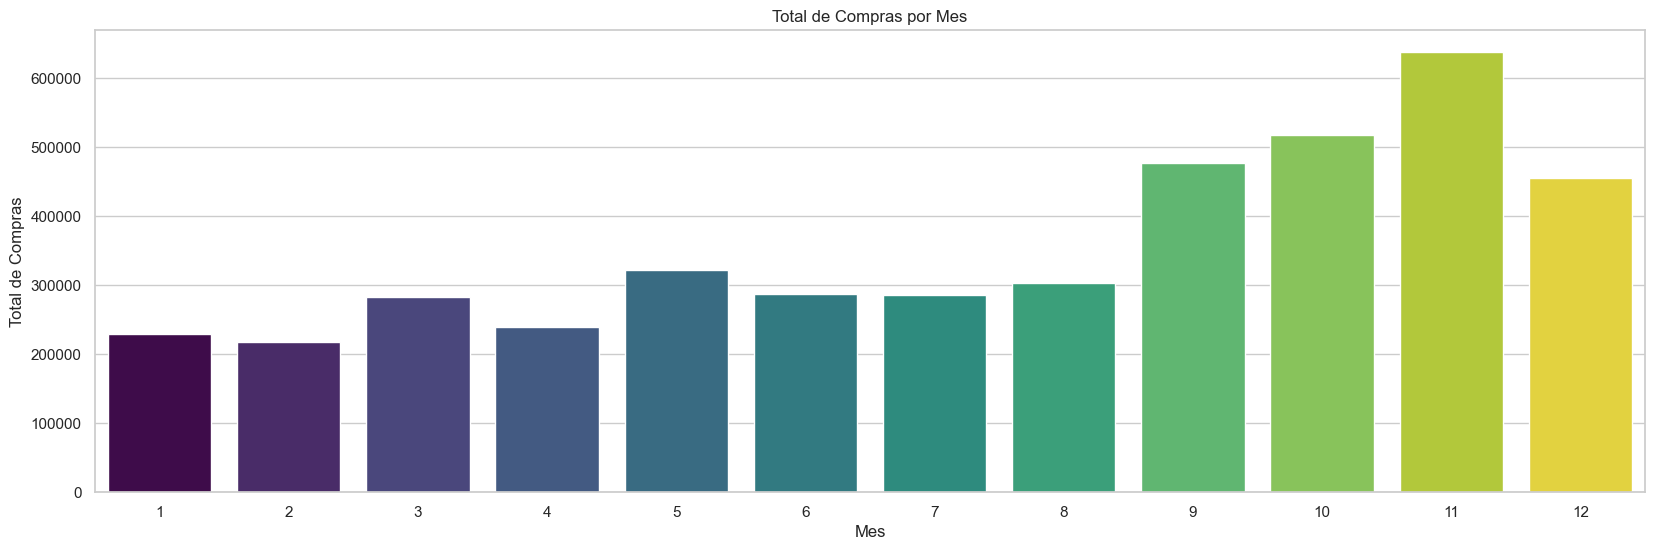

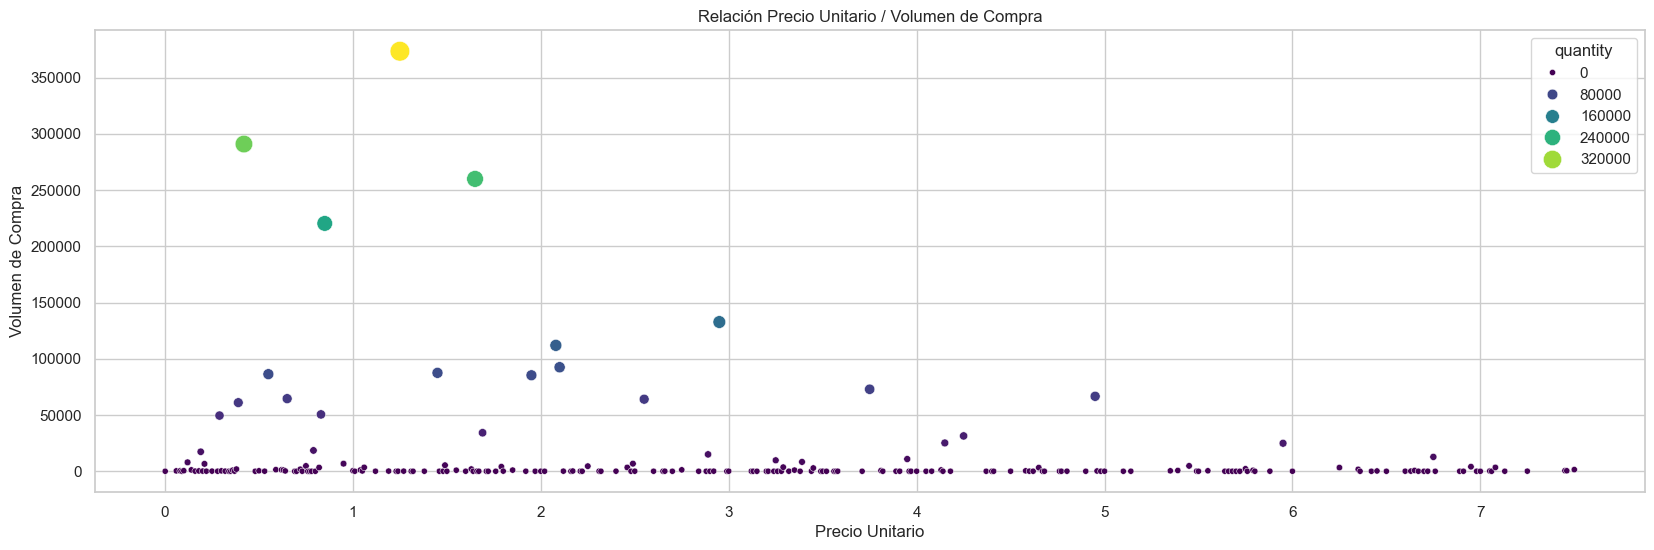

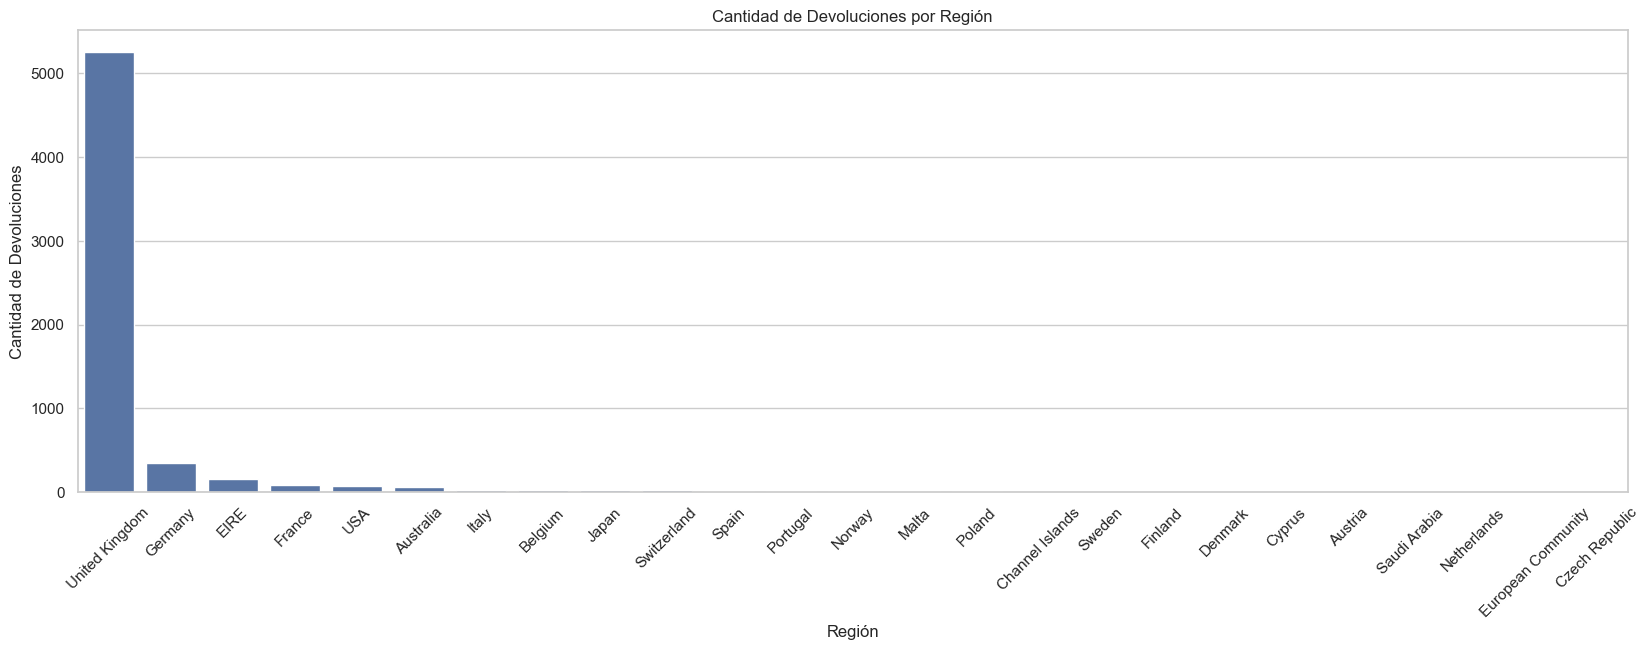

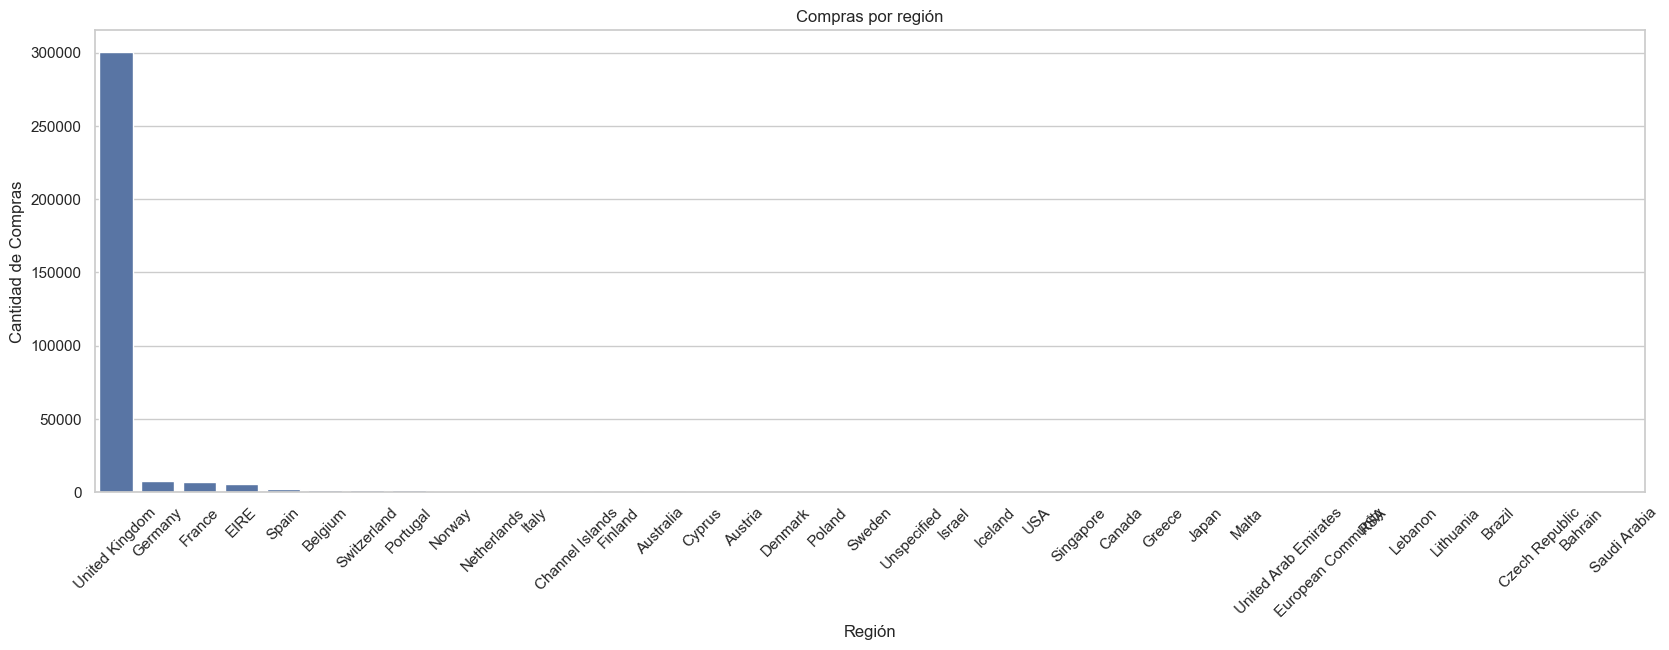

C:\Users\Natalia Lopera\AppData\Local\Temp\ipykernel_23320\3852227677.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=global_top_products.values, y=global_top_products.index, palette='viridis')


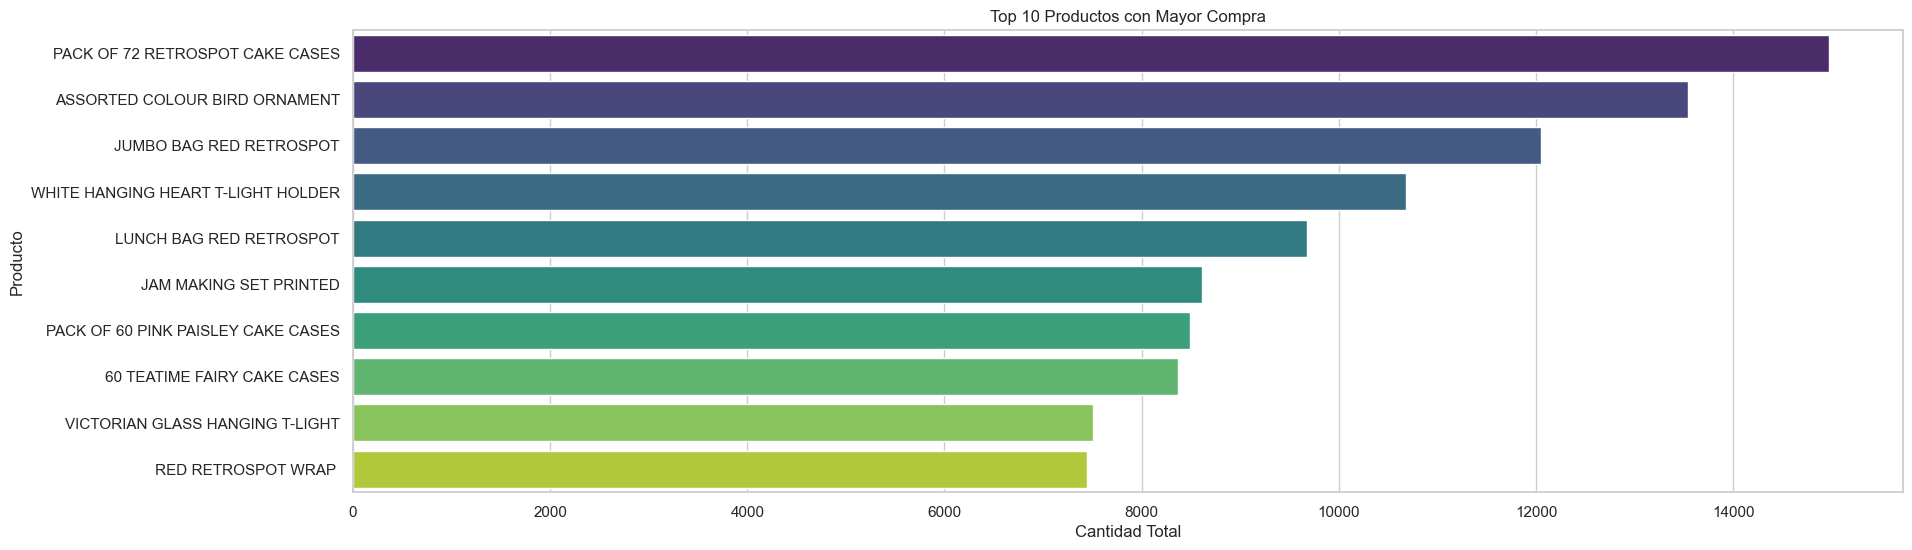

C:\Users\Natalia Lopera\AppData\Local\Temp\ipykernel_23320\1131635411.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_returns.values, y=top_returns.index, palette='viridis')


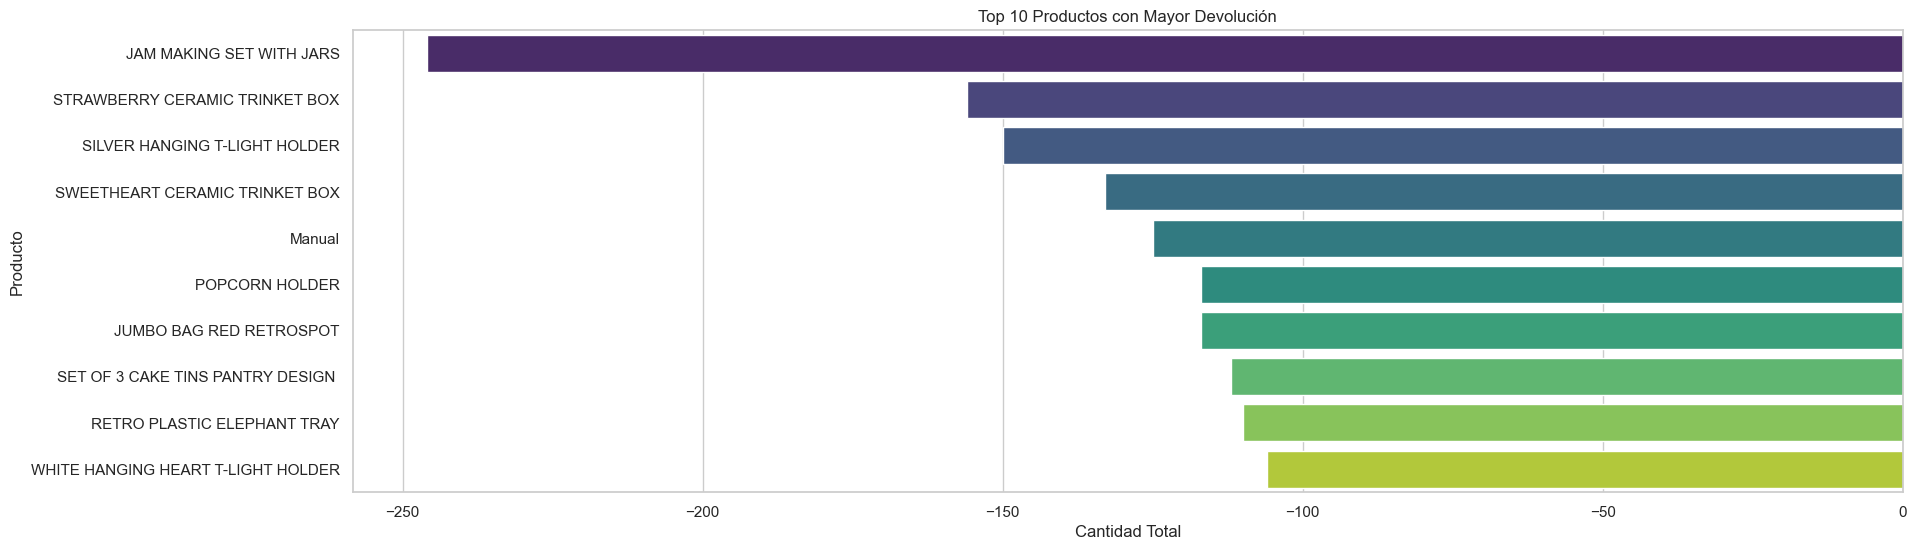

C:\Users\Natalia Lopera\AppData\Local\Temp\ipykernel_23320\3432477972.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='unit_price', data=df, palette='viridis')


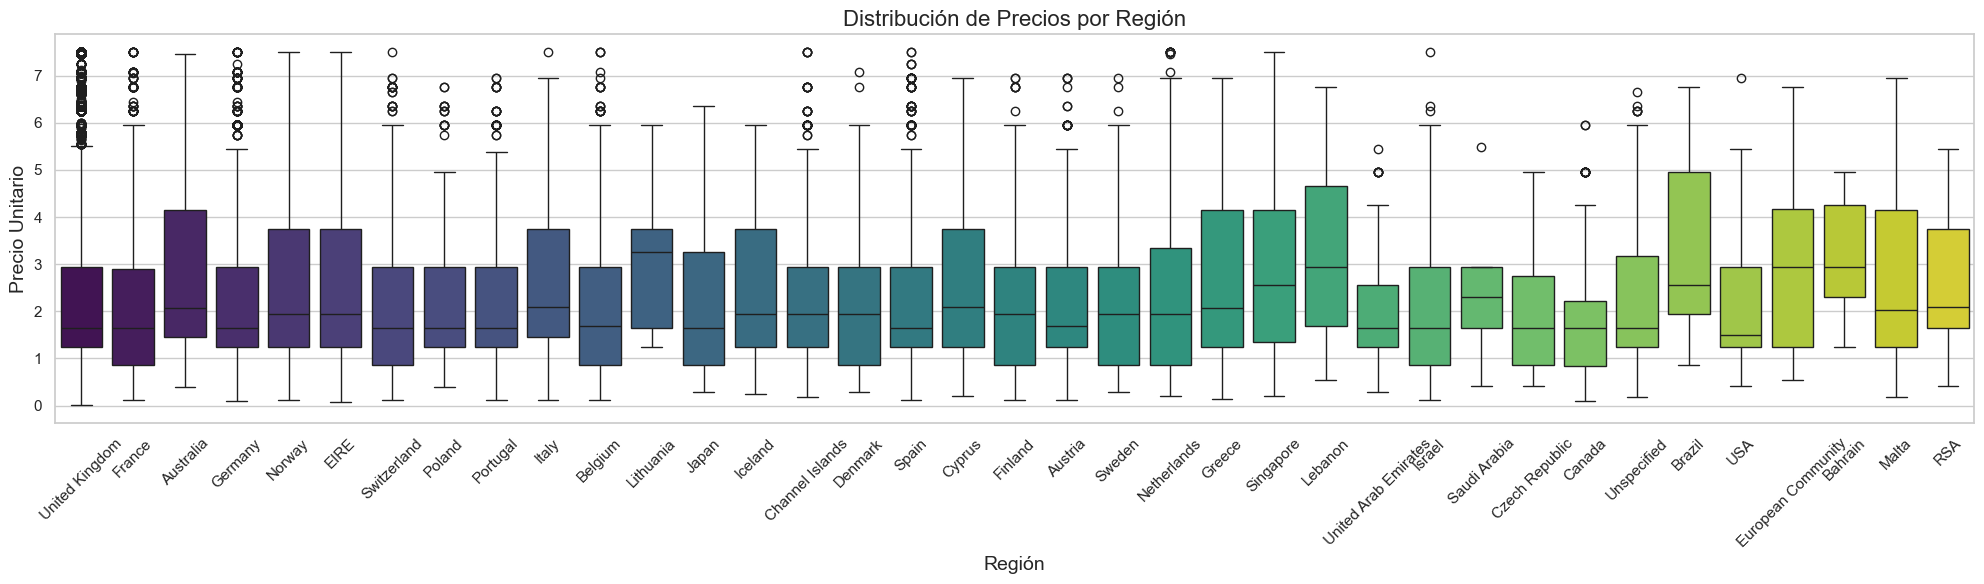

C:\Users\Natalia Lopera\AppData\Local\Temp\ipykernel_23320\3974490556.py:59: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  distance = np.abs(np.cross(p2-p1, p1-p))/np.linalg.norm(p2-p1)


El número óptimo de clusters es: 3


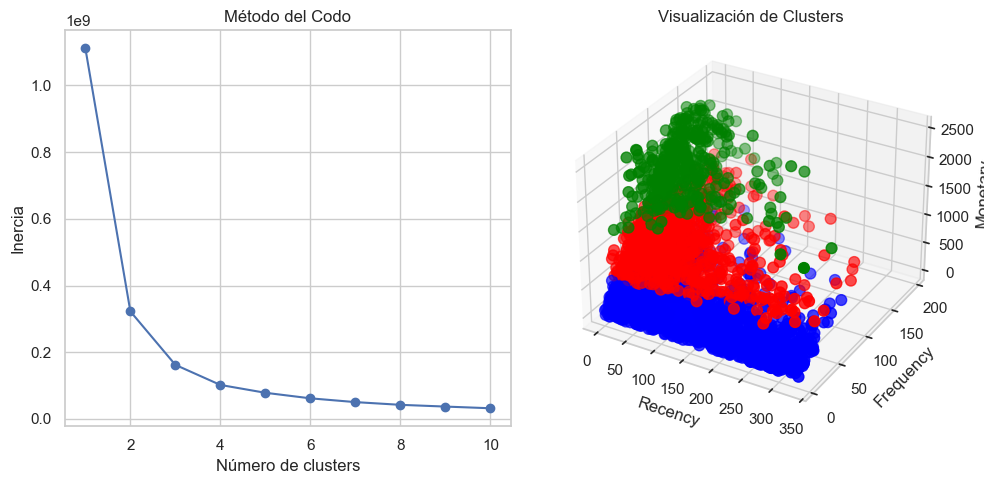

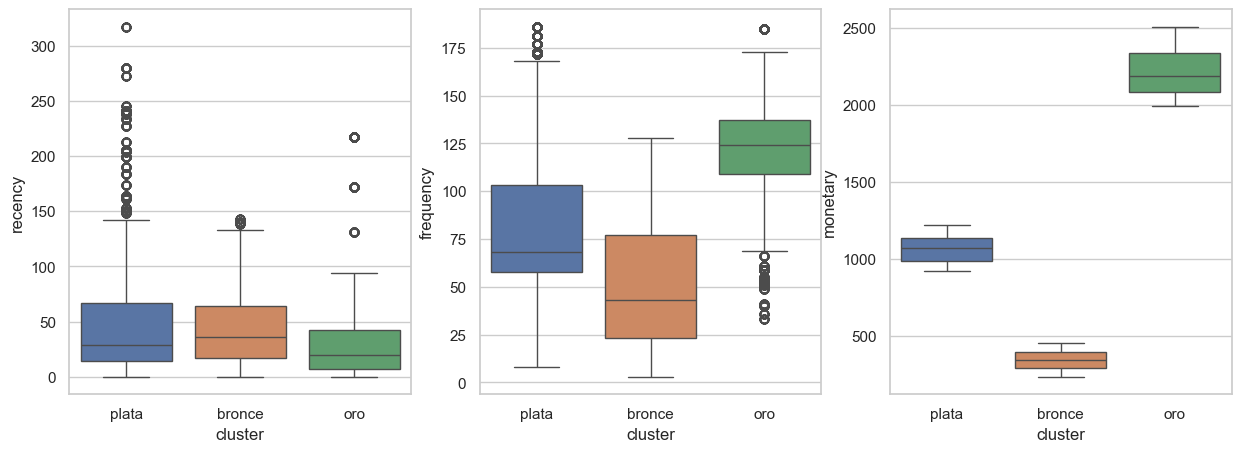

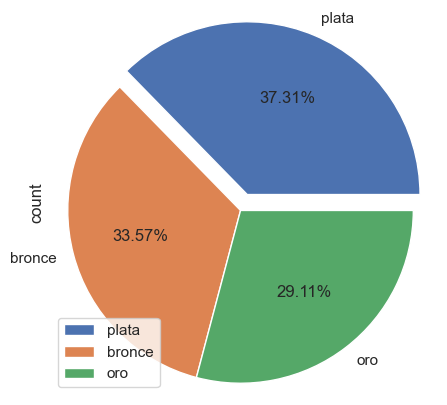

Recency cluster
bronce    43.77
oro       29.77
plata     48.59
Name: recency, dtype: float64
Frequency cluster
bronce     51.97
oro       120.55
plata      85.32
Name: frequency, dtype: float64
Monetary cluster
bronce     344.14
oro       2210.34
plata     1067.02
Name: monetary, dtype: float64
cluster oro: clientes que han comprado recientemente, compran con frecuencia y gastan mucho
cluster plata: clientes intermedios 
cluster bronce: clientes que no han comprado recientemente, compran con poca frecuencia y gastan poco


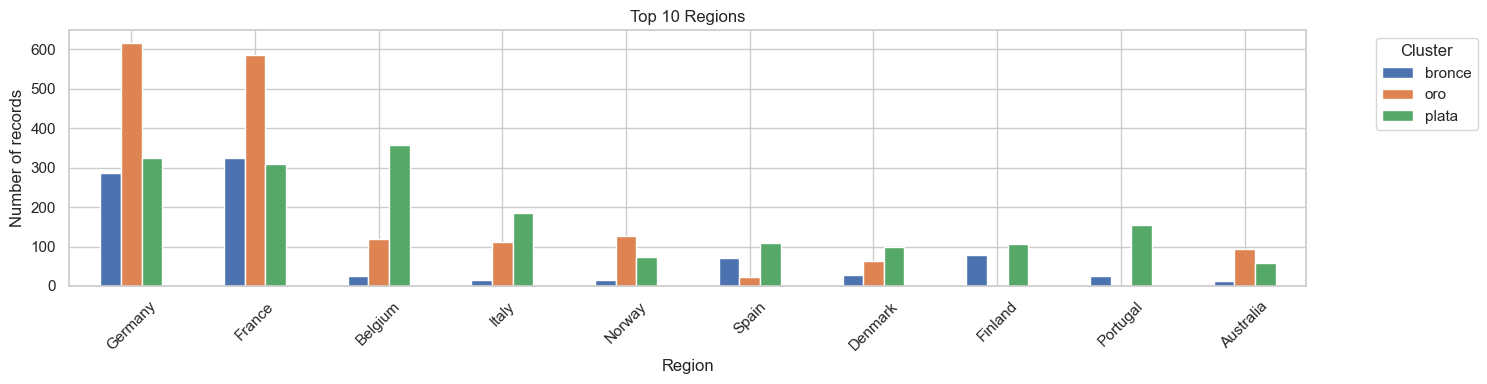

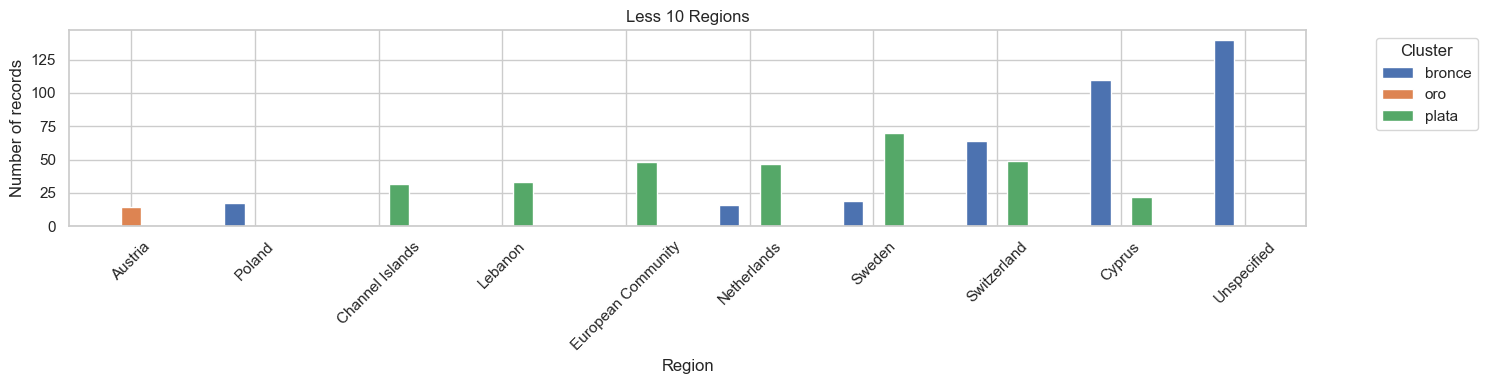

In [68]:
# Ejecución -----------------------------------------------------------------------------------
file_path = 'Online_Retail.csv'
output_directory = 'C:\\Users\\Natalia Lopera\\OneDrive\\Desktop\\Busqueda_Trabajo\\proyectos_propios\\hackathon'
df = process_dataset(file_path, output_directory)


# Creación de métricas -----------------------------------------------------------------------------------
file_path = 'C:\\Users\\Natalia Lopera\\OneDrive\\Desktop\\Busqueda_Trabajo\\proyectos_propios\\hackathon\\docsdf_processed.csv'
create_all_graphs(file_path)

#Creación de modelo de machine learning y clasificación de clientes kmean
ml_kmean('docsdf_processed.csv')

#Graficar los clusters
df_final = pd.read_csv('df_final.csv')
ml_plots(df_final)


<div style="text-align: center; font-weight: bold; font-size: 18px;">
    Conclusiones de la Etapa de Exploración y Procesamiento de Datos
</div>

**Variabilidad de Precios**

La distribución de los precios es mas o menos uniforme, en la mayoría de las regiones oscila entre 1 y 4 dolares, aunque se encontraron algunos productos que valen 5 dolares o más. Estos se tomaron como valores extremos o outliers, porque no es un atendencia.

**Devoluciones de Productos**

Los principales productos devueltos incluyen:
“JAM MAKING SET WITH JARS”, “GUMBALL COAT RACK”, “PLASTERS IN TIN CIRCUS PARADE”, siento “jam making set with jars” el producto con mayor número de devoluciones.

**Productos Más Vendidos**

“PLASTERS IN TIN WOODLAND ANIMALS”, “PLASTERS IN TIN CIRCUS PARADE” and “PACK OF 72 RETROSPOT CAKE CASES” lideran la lista de productos más vendidos, siento este ultimo el que presenta cifras más altas con más de 3000 unidades.

**Comportamiento de las Ventas de acuerdo a la Temporada del Año**

- Noviembre y octubre presentan las ventas más altas, probablemente debido a las compras navideñas.
- Las ventas varían considerablemente de un mes a otro, indicando la influencia de factores estacionales o promociones específicas.

**Precio por Unidad vs Cantidad**

Los productos con precios bajos tienden a venderse en grandes cantidades, mientras que los productos con precios más altos tienden a venderse menos, lo cual es típico de bienes premium o especializados.
Esta relación puede ayudar a identificar estrategias de precios adecuados que maximicen tanto las ventas como los ingresos.

**Ventas por Regiones Principales**

Excluyendo el Reino Unido, ya que concentra la mayor de los clientes, Alemania y Francia son los mayores mercados en términos de volumen de ventas. Mientras que países como Arabia Saudita y Bahréin, presentan ventas considerablemente bajas. 

**Anotaciones importantes**

- Variabilidad Regional: La variabilidad en la distribución de precios unitarios entre regiones destaca la necesidad de estrategias de precios y marketing regional.
- Gestión de Devoluciones: Los productos con alta tasa de devoluciones requieren un replanteamiento para mejorar calidad y cumplir expectativas del cliente.
- Productos Populares: Identificar y mantener un suministro constante de productos populares es vital para garantizar la satisfacción de la demanda.
- Patrones de Ventas en Temporada: Los picos de ventas en ciertos meses resaltan la necesidad de planificación.
- Desempeño Regional: El análisis de las ventas por región puede ayudar a identificar mercados principales y facilitar decisiones de expansión.

**Comentarios sobre el Clustering** 

La metodología RFM (Recency, Frequency, Monetary) es una técnica utilizada para segmentar y entender el comportamiento de los clientes en base a estas tres variables. Por lo anterior, se obtuvieron las métricas: Recency, Frequency y Monetary (RFM) para el conjunto de datos analizados, donde:

- Recency: Muestra la diferencia en días entre la fecha más reciente y la última compra de cada cliente.
- Frequency: Es el número de compras realizadas por cada cliente.
- Monetary: Representa el gasto total de cada cliente.

Posteriormente, estas tres nuevas variables se utilizaron para determinar el número óptimo de clusters mediante el método del codo, identificando 3 clusters óptimos. Luego, se aplicó el algoritmo K-means con este número óptimo de clusters, segmentando a los clientes en tres grupos diferenciados: oro, plata y bronce.

- **Clientes oro:** Clientes muy activos con compras recientes y un gasto elevado.
- **Clientes plata:** Clientes activos que compran frecuentemente y gasto medio.
- **Clientes bronce:** Clientes que realizan compras esporádicas con compras menos recientes y gasto bajo.

Esta segmentación permite a la empresa identificar y enfocar sus estrategias de marketing y retención de manera más efectiva a un grupo o a varios. 

<div style="text-align: center; font-weight: bold; font-size: 18px;">
    Propuestas de Marketing para Mejorar el Comportamiento de la Empresa
</div>

1. **Fortalecimiento de la Marca en Mercados Clave**

- **Campañas de Concienciación:** Lanzar campañas de marketing dirigidas en países con ventas más bajas para aumentar el conocimiento de la marca. Utilizar redes sociales, publicidad digital y colaboraciones con influencers locales para conectar con los consumidores.
- **Eventos Locales:** Participar o patrocinar eventos locales que resalten la marca. Esto puede ayudar a establecer una presencia más fuerte y a interactuar directamente con los clientes potenciales.

2. **Segmentación y Personalización**

- **Campañas Personalizadas:** Utilizar datos de comportamiento del cliente para segmentar a los clientes en grupos más específicos y personalizar las campañas de marketing para cada grupo. Por ejemplo, enviar ofertas exclusivas a los clientes plata para incentivarlos a convertirse en clientes oro.
- **Programas de Lealtad:** Desarrollar un programa de lealtad que ofrezca recompensas atractivas para incentivar a los clientes plata a aumentar su gasto y frecuencia de compra. Esto puede incluir descuentos exclusivos, acceso anticipado a nuevos productos o eventos VIP.

3. **Optimización del Portfolio de Productos**

- **Adaptación de Productos:** Analizar las preferencias de los consumidores en mercados específicos y adaptar la oferta de productos en función de estas preferencias. Esto puede incluir la introducción de productos populares en el Reino Unido en mercados con ventas más bajas.
- **Promociones Estratégicas:** Implementar promociones de productos específicos que han mostrado un rendimiento positivo en otros mercados, pero que aún no han sido bien recibidos en los mercados de bajo rendimiento.


Visualización de datos en pagina web
https://kelvinsuarez.github.io/rfm-analysis-visualization-react/


<div style="text-align: center; font-weight: bold; font-size: 18px;"> Conclusions from the Data Exploration and Processing Stage </div>

**Price Variability**

The price distribution is more or less uniform, mostly ranging between $1 and $4 in most regions, although some products were found to cost $5 or more. These were considered extreme values or outliers, as they do not represent a trend.

**Product Returns**

The main returned products include: “JAM MAKING SET WITH JARS,” “GUMBALL COAT RACK,” “PLASTERS IN TIN CIRCUS PARADE,” with “jam making set with jars” being the product with the highest number of returns.

**Best-Selling Products**

“PLASTERS IN TIN WOODLAND ANIMALS,” “PLASTERS IN TIN CIRCUS PARADE,” and “PACK OF 72 RETROSPOT CAKE CASES” lead the list of best-selling products, with the latter showing the highest figures at over 3,000 units.

**Sales Behavior According to the Season of the Year**

November and October show the highest sales, likely due to holiday shopping.
Sales vary significantly from month to month, indicating the influence of seasonal factors or specific promotions.

**Price per Unit vs Quantity**

Products with lower prices tend to be sold in large quantities, while higher-priced products tend to sell less, which is typical of premium or specialized goods. This relationship can help identify suitable pricing strategies that maximize both sales and revenue.

**Sales by Major Regions**

Excluding the United Kingdom, which has the highest concentration of customers, Germany and France are the largest markets in terms of sales volume. In contrast, countries like Saudi Arabia and Bahrain show considerably low sales.

**Important Notes**

- Regional Variability: The variability in unit price distribution among regions highlights the need for regional pricing and marketing strategies.
- Returns Management: Products with high return rates require rethinking to improve quality and meet customer expectations.
- Popular Products: Identifying and maintaining a consistent supply of popular products is vital to ensure demand satisfaction.
- Seasonal Sales Patterns: Sales spikes in certain months underscore the need for planning.
- Regional Performance: Analyzing sales by region can help identify key markets and facilitate expansion decisions.

**Comments on Clustering**

The RFM (Recency, Frequency, Monetary) methodology is a technique used to segment and understand customer behavior based on these three variables. Thus, the metrics Recency, Frequency, and Monetary (RFM) were obtained for the analyzed dataset, where:

**Recency:** Shows the difference in days between the most recent date and the last purchase of each customer.
**Frequency:** Represents the number of purchases made by each customer.
**Monetary:** Reflects the total spending of each customer.

Subsequently, these three new variables were used to determine the optimal number of clusters using the elbow method, identifying three optimal clusters. The K-means algorithm was then applied with this optimal number of clusters, segmenting customers into three distinct groups: gold, silver, and bronze.

**Gold Customers:** Very active customers with recent purchases and high spending.
**Silver Customers:** Active customers who buy frequently and have medium spending.
**Bronze Customers:** Customers who make sporadic purchases with less recent activity and low spending.

This segmentation allows the company to identify and focus its marketing and retention strategies more effectively on one or multiple groups.

<div style="text-align: center; font-weight: bold; font-size: 18px;"> Marketing Proposals to Improve Company Performance </div>

1. **Strengthening the Brand in Key Markets**
- Awareness Campaigns: Launch targeted marketing campaigns in countries with lower sales to increase brand awareness. Utilize social media, digital advertising, and collaborations with local influencers to connect with consumers.
- Local Events: Participate in or sponsor local events that highlight the brand. This can help establish a stronger presence and engage directly with potential customers.

2. **Segmentation and Personalization**
- Personalized Campaigns: Use customer behavior data to segment customers into more specific groups and customize marketing campaigns for each group. For example, send exclusive offers to silver customers to encourage them to become gold customers.
- Loyalty Programs: Develop a loyalty program that offers attractive rewards to incentivize silver customers to increase their spending and purchase frequency. This can include exclusive discounts, early access to new products, or VIP events.

3. **Optimizing the Product Portfolio**
- Product Adaptation: Analyze consumer preferences in specific markets and adapt the product offering based on these preferences. This may include introducing popular products from the UK to markets with lower sales.
- Strategic Promotions: Implement promotions for specific products that have shown positive performance in other markets but have not yet been well received in underperforming markets.

Data visualization on a website
https://kelvinsuarez.github.io/rfm-analysis-visualization-react/